<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_06 - Modelos Jerarquicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Conglomerados: Conglomerados Jerárquicos

## Definición


Los resultados de aplicar algoritmos de agrupación K-means, u otros algoritmos de clauterización como K-medoids dependen de la elección del número de grupos a buscar y de una asignación de configuración inicial. En contraste, los métodos de agrupación jerárquica no requieren tales especificaciones. En cambio, requieren que el usuario especifique una medida de disimilitud entre grupos (disjuntos) de observaciones, basada en las disimilitudes pareja a pareja entre las observaciones en los dos grupos.

Como su nombre sugiere, estos métodos producen representaciones jerárquicas en las que los grupos en cada nivel de la jerarquía se crean fusionando grupos en el nivel inferior siguiente. En el nivel más bajo, cada grupo contiene una sola observación. En el nivel más alto, hay solo un grupo que contiene todos los datos.

Las estrategias para la agrupación jerárquica se dividen en dos paradigmas básicos: aglomerativo (de abajo hacia arriba) y divisivo (de arriba hacia abajo).

Las estrategias aglomerativas comienzan desde abajo y en cada nivel fusionan de manera recursiva un par seleccionado de grupos en un solo grupo. Esto produce una agrupación en el nivel superior con un grupo menos. El par elegido para la fusión consta de los dos grupos con la menor disimilitud intergrupal.

Los métodos divisivos comienzan desde arriba y en cada nivel dividen de manera recursiva uno de los grupos existentes en ese nivel en dos nuevos grupos. La división se elige para producir dos nuevos grupos con la mayor disimilitud entre grupos.

Con ambos paradigmas, hay $N - 1$ niveles en la jerarquía, donde $N$ es el número total de observaciones.

Cada nivel de la jerarquía representa una agrupación particular de los datos en grupos disjuntos de observaciones. Toda la jerarquía representa una secuencia ordenada de tales agrupaciones. Depende del usuario decidir qué nivel (si alguno) representa en realidad una agrupación *"natural"* en el sentido de que las observaciones dentro de cada uno de sus grupos son lo suficientemente similares entre sí como para que difieran significativamente de las observaciones asignadas a diferentes grupos en ese nivel. El estadístico Gap mencionado anteriormente se puede utilizar para este propósito.

La división/aglomeración binaria recursiva se puede representar mediante un árbol binario con raíz. Los nodos del árbol representan grupos. El nodo raíz representa el conjunto de datos completo. Los N nodos terminales representan cada uno de las observaciones individuales (grupos singleton). Cada nodo no terminal ("padre") tiene dos nodos hijas. Para la agrupación divisiva, las dos hijas representan los dos grupos resultantes de la división del padre; para la agrupación aglomerativa, las hijas representan los dos grupos que se fusionaron para formar el padre.

## Metricas de Distancia

Como se ha mencionado, se requiere de una métrica de distancia que define la disimilitud entre cada par de muestras. Ya hemos analizado muchos de ellos pero, en este
En contexto, es útil comenzar a considerar la distancia genérica de Minkowski (parametrizada con $p$):

$$d_p(\bar{x}_i,\bar{x}_j)=\biggl(\sum_{k}{|\bar{x}_i^{(k)}-\bar{x}_i^{(k)}|^p}\biggr)^{\frac{1}{p}}$$

Mencionamos dos casos particulares muy utilizados. Para $p=2$ tenemos la llamada distancia euclideana.

$$d_2(\bar{x}_i,\bar{x}_j)=\sqrt{\sum_{k}{\biggl(\bar{x}_i^{(k)}-\bar{x}_i^{(k)}\biggr)^2}}=||\bar{x}_i-\bar{x}_j||_2$$

Para $p=1$ se obtiene la distancia de Manhatan o distancia del taxista.

$$d_1(\bar{x}_i,\bar{x}_j)=\sum_{k}{|\bar{x}_i^{(k)}-\bar{x}_i^{(k)}|}=||\bar{x}_i-\bar{x}_j||_1$$

Luego de elegir una distancia, pasamos a la creacion a la matriz de distancias $P$, que es una matriz simétrica y todos sus elementos de la diagonal son nulos.

$$P_{ij}=[d(\bar{x}_i,\bar{x}_j)]$$


El siguiente paso es definir una estrategia de fusión, la cual, en este caso, se llama enlace. El objetivo de un método de enlace es encontrar los grupos que deben fusionarse en uno solo en cada nivel de la jerarquía. Por lo tanto, debe trabajar con conjuntos de muestras genéricas que representen los grupos. En este caso, supongamos que estamos analizando un par de grupos $(C_a, C_b)$ y necesitamos encontrar qué índice, $a$ o $b$, corresponde a la pareja que será fusionada.

## Funciones de Enlace

### Enlace Simple
El método de enlace simple selecciona la pareja que contiene el par más cercano de muestras (cada una de ellas perteneciente a un clúster diferente). Este proceso se muestra en el siguiente diagrama.

$$\large L_{simple}(a,b)=\min\{d(\bar{x}_i,\bar{x}_j) \forall \bar{x}_i \in C_a \wedge \bar{x}_j \in C_b \}$$

<img src="https://drive.google.com/uc?export=view&id=1HypMtZDpKXacPTpn8zRQ_pjE6fCdatNr" width = "400" align="center"/>

La principal desventaja de este método es la posibilidad de tener pequeños clústeres junto con otros muy grandes. Como veremos en la siguiente sección, el enlace único puede mantener aislados a los valores atípicos hasta que existan niveles de disimilitud muy altos. Para evitar o mitigar este problema, se pueden utilizar los métodos de promedio y Ward.

### Enlace Completo
El objetivo de este método de enlace es minimizar la distancia entre las muestras más alejadas que pertenecen a los clústeres fusionados. En el siguiente diagrama, se muestra un ejemplo de enlace completo. Su formula es.

$$\large L_{completo}(a,b)=\max\{d(\bar{x}_i,\bar{x}_j) \forall \bar{x}_i \in C_a \wedge \bar{x}_j \in C_b \}$$

<img src="https://drive.google.com/uc?export=view&id=1jpKWEBx_Q0fYUuskKVLNY0Ji_lGyZbKP" width = "400" align="center"/>

Es fácil entender que el enlace completo resulta en la maximización de la densidad del clúster, considerando todas las combinaciones posibles. En el ejemplo mostrado en el diagrama anterior, si el número deseado de clústeres es dos, fusionar $C_1$ y $C_2$ o $C_2$ y $C_3$ daría como resultado una configuración final con menos cohesión, lo cual suele ser un resultado no deseado


### Enlace Promedio

$$\large L_{promedio}(a,b)=\frac{1}{|C_a| |C_b|}\sum_{\bar{x}_i \in C_a} \sum_{\bar{x}_j \in C_b} {d(\bar{x}_i,\bar{x}_j)} \forall C_a,C_b$$

La idea es bastante similar al enlace completo, pero en este caso se tiene en cuenta el promedio de cada clúster y el objetivo es minimizar la distancia promedio entre clústeres, considerando todos los pares posibles (Ca, Cb). El siguiente diagrama muestra un ejemplo de enlace promedio

<img src="https://drive.google.com/uc?export=view&id=1BRqFp-Q0M4Hl5jYoK_mmf5WCRrCkeveR" width = "400" align="center"/>

El enlace promedio es particularmente útil en aplicaciones de bioinformática (que es el contexto principal en el que se ha definido el agrupamiento jerárquico). La explicación matemática de sus propiedades es compleja y te animo a consultar el artículo original (*"A Statistical Method for Evaluating Systematic Relationships", Sokal R., Michener C., University of Kansas Science Bulletin, 38, 1958*) para obtener más detalles.


### Enlace de Ward

El último método que vamos a discutir se llama enlace de Ward (llamado así por su autor y originalmente propuesto en *"Hierarchical Grouping to Optimize an Objective Function", Ward Jr J. H., Journal of the American Statistical Association. 58(301), 1963*). Está basado en la distancia euclidiana y la definición formal es la siguiente:

$$\large L_{ward}(a,b)=\sum_{\bar{x}_i \in C_a} \sum_{\bar{x}_j \in C_b} {||\bar{x}_i-\bar{x}_j||_2^2} \forall C_a,C_b$$

En cada nivel, se consideran todos los clústeres y se seleccionan dos de ellos con el objetivo de minimizar la suma de las distancias al cuadrado. El proceso en sí no difiere mucho del enlace promedio y es posible demostrar que el proceso de fusión conduce a una reducción en la varianza de los clústeres (es decir, aumenta su cohesión interna). Además, el enlace de Ward tiende a producir clústeres que contienen aproximadamente el mismo número de muestras (es decir, en comparación con el enlace único, el método de Ward evita la presencia de clústeres pequeños junto con otros muy grandes, como se discute en la siguiente sección). El enlace de Ward es una elección predeterminada popular, pero para tomar la decisión correcta en cada contexto específico, es necesario introducir el concepto de dendrograma.


## Analisis de un Dendograma

Todos los métodos aglomerativos y algunos métodos divisivos (cuando se ven de abajo hacia arriba) poseen una propiedad de monotonía. Es decir, la disimilitud entre los grupos fusionados aumenta monótonamente con el nivel de la fusión. Por lo tanto, el árbol binario se puede representar de manera que la altura de cada nodo sea proporcional al valor de la disimilitud intergrupal entre sus dos hijas. Los nodos terminales que representan observaciones individuales se representan todos a una altura de cero. Este tipo de representación gráfica se llama dendrograma.

Un dendrograma proporciona una descripción completa y altamente interpretable de la agrupación jerárquica en un formato gráfico. Esta es una de las principales razones de la popularidad de los métodos de agrupación jerárquica.

La idea es bastante sencilla: colocar las muestras en el eje x y el nivel de disimilitud en el eje y. Cada vez que dos clústeres se fusionan, el dendrograma muestra una conexión correspondiente al nivel de disimilitud en el que ocurrió la fusión. Por lo tanto, en un escenario aglomerativo, un dendrograma siempre comienza con todas las muestras consideradas como clústeres y se mueve hacia arriba (la dirección es puramente convencional) hasta que se define un solo clúster.

Con fines didácticos, es preferible mostrar el dendrograma correspondiente a un conjunto de datos muy pequeño, X, pero todos los conceptos que vamos a discutir pueden aplicarse a cualquier situación. Sin embargo, con conjuntos de datos más grandes, a menudo será necesario aplicar algunas truncaciones para visualizar toda la estructura de una forma más compacta. Consideremos un conjunto de datos pequeño, $X$, compuesto por 12 muestras bidimensionales generadas por 4 distribuciones gaussianas con vectores medios en el rango $(-1, 1) × (-1, 1)$:


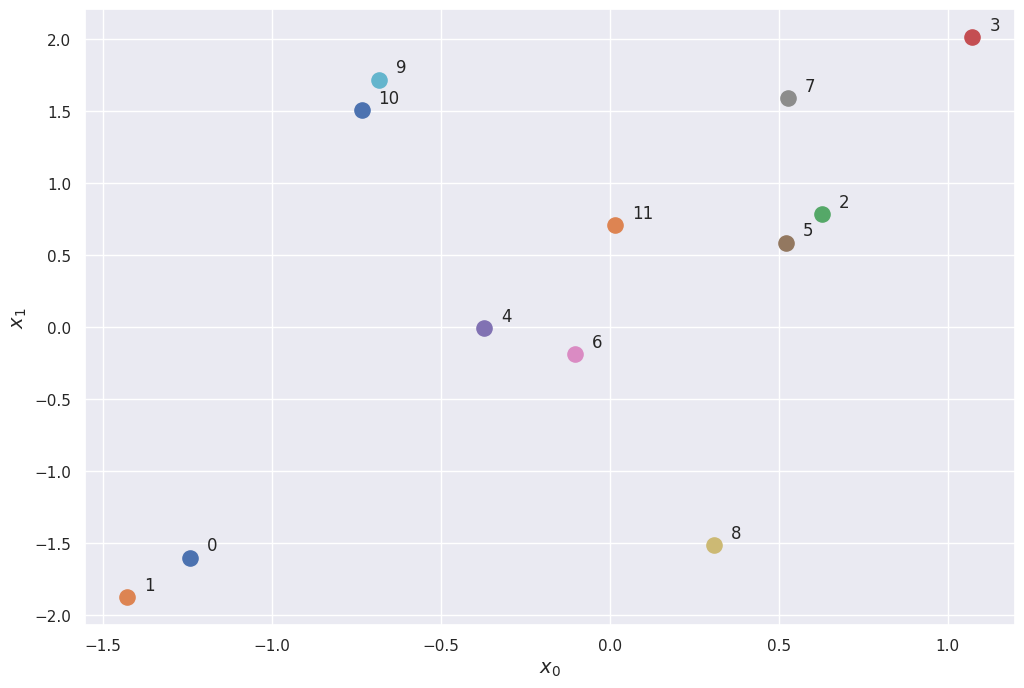

In [2]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Establecemos una semilla para reproducibilidad
np.random.seed(100)

# Define variables auxiliares
nb_samples = 12
nb_centers = 4
X, Y = make_blobs(n_samples=nb_samples, n_features=2, center_box=[-1, 1], centers=nb_centers, random_state=100)

# Mostramos la data
sns.set()
fig, ax = plt.subplots(figsize=(12, 8))
for i, x in enumerate(X):
    ax.scatter(x[0], x[1], s=120)
    ax.annotate('%d' % i, xy=(x[0] + 0.05, x[1] + 0.05), fontsize=12)
ax.set_xlabel(r'$x_0$', fontsize=14)
ax.set_ylabel(r'$x_1$', fontsize=14)
plt.show()

Para generar un dendrograma (usando ```SciPy```), primero necesitamos crear una matriz de enlace. En este caso, hemos elegido una métrica euclidiana con el enlace de Ward (pero, como es habitual, te animamos a realizar el análisis con diferentes configuraciones).

El array dm es una matriz condensada de distancias por pares, mientras que $Z$ es la matriz de enlace producida por el método de Ward (la función ```linkage()``` requiere el parámetro ```method```, que acepta, entre otros, los valores ```single```, ```complete```, ```average``` y ```ward```). En este punto, podemos generar y trazar el dendrograma (la función ```dendrogram()``` puede trazar automáticamente el diagrama utilizando un objeto de ejes predeterminado o suministrado por ```Matplotlib```):

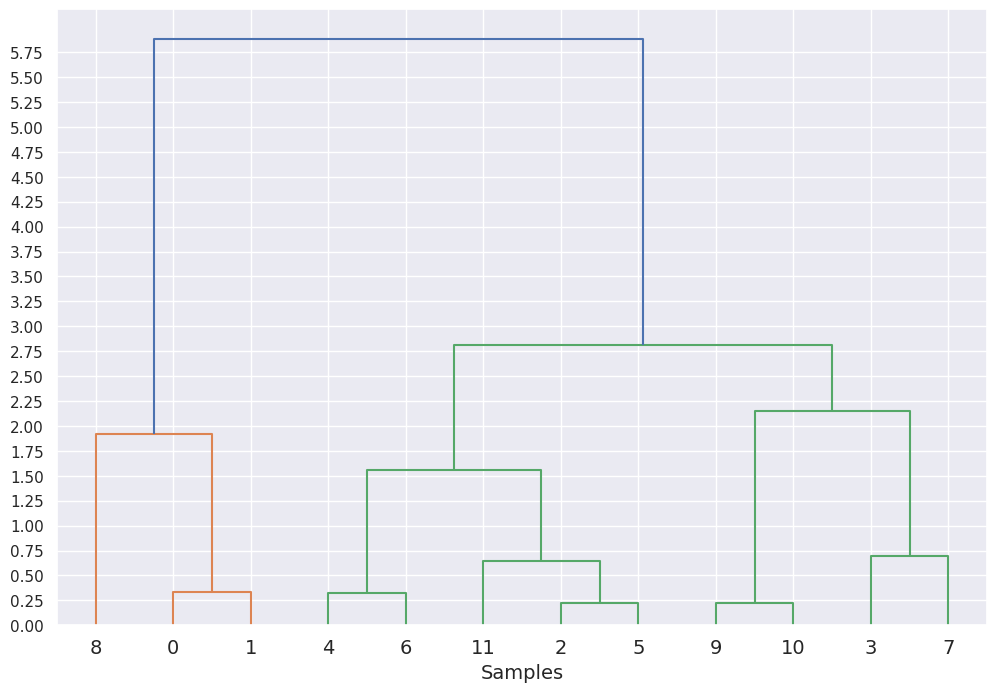

In [3]:
# Importamos librerias
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

# Calculo de la matriz de distancia y generamos el metodo
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='ward')

# Mostramos el dendograma
fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Samples', fontsize=14)
ax.set_yticks(np.arange(0, 6.0, 0.25))
plt.show()

Como se explicó en la imagen anterior, el eje x representa las muestras con la intención de minimizar el riesgo de conexiones cruzadas, mientras que el eje y muestra el nivel de disimilitud. Ahora analicemos el diagrama desde la parte inferior. El estado inicial corresponde a todas las muestras consideradas como clústeres independientes (por lo que la disimilitud es nula). Al avanzar hacia arriba, comenzamos a observar las primeras fusiones. En particular, cuando la disimilitud es aproximadamente 0.25, las muestras 9 y 10 se fusionan, seguidas rápidamente de las muestras 2 y 5. Luego, al nivel de 0.30 de disimilitud, las muestras 0 y 1 se juntan, así como las muestras 4 y 6.

Para pasar a las siguientes agrupaciones tenemos que subir hasta un nivel de disimilitud de 0.7, que es donde la muestra 11 se une al grupo formado anteriormente por las muestras 2 y 5. También a este nivel se unen las muestras 3 y 7.

Siguiendo con el análisis, las próximas agrupaciones ocurren a una disimilitud de 1.5, 1.9 y 2.2 respectivamente. Corresponden a (4,6) con (2,5,11), luego 8 y (0,1) y finalmente (9,10) y (3,7).

La penúltima agrupación ocurre entre el primer y último grupo mencionado anteriormente, a una disimilitud de 2.8. La agrupación total de las muestras ocurre a un nivel de disimilitud de más de 5.75

## Coficiente de Correlacion Cofenética

El rendimiento del agrupamiento jerárquico puede ser evaluado utilizando cualquiera de los métodos presentados en los capítulos anteriores. Sin embargo, en este caso particular, se puede emplear una medida específica (que no requiere la verdad absoluta). Dada una matriz de proximidad, $P$, y un enlace, $L$, un par de muestras, $x_i$ y $x_j ∈ X$, siempre son asignadas al mismo grupo en un cierto nivel jerárquico. Por supuesto, es importante recordar que en el escenario aglomerativo, comenzamos con $n$ grupos diferentes y terminamos con un único grupo equivalente a $X$. Además, a medida que dos grupos fusionados se convierten en uno solo, dos muestras pertenecientes a un grupo siempre seguirán perteneciendo al mismo grupo ampliado hasta el final del proceso.

En este punto, podemos definir $DL_ij$ como el nivel de disimilitud en el que $x_i$ y $x_j$ pertenecen al mismo grupo por primera vez, y la matriz cofenética denotada como $CP$ en la siguiente matriz $(n × n)$.

$$CP_{ij}=[DL_{ij}]$$

En otras palabras, el elemento $CP_{ij}$ es la disimilitud más pequeña necesaria para observar a $x_i$ y $x_j$ en el mismo grupo. Es posible demostrar que $CP_{ij}$ es una métrica de distancia entre $x_i$ y $x_j$. Por lo tanto, $CP_{ij}$ es análogo a $P$ y tiene las mismas propiedades de la matriz de proximidad (por ejemplo, todos los elementos diagonales son nulos). En particular, nos interesa su correlación (normalizada en el rango de -1 a 1). Dicho valor (coeficiente de correlación cofenética, $CPC$) indica el nivel de concordancia entre $P$ y $CP$ y puede calcularse fácilmente, como se muestra en la siguiente ecuación.

$$CPC=\frac{ \frac{2}{n(n-1)} \sum_{(i,j)\in Diag(CP)} P(i,j) \cdot CP(i,j) - \hat{P} \cdot \hat{CP}}{ \sqrt{SP \cdot SCP}} $$

En donde

$SP=\frac{2}{n(n-1)}\sum\limits_{(i,j)\in Diag(P)} P(i,j)^2 - \hat{P}^2$

$SCP=\frac{2}{n(n-1)}\sum\limits_{(i,j)\in Diag(CP)} CP(i,j)^2 - \hat{CP}^2$

La ecuación anterior se basa en la suposición de que si tres muestras, $x_i$, $x_j$ y $x_p$, tienen distancias tales como $d(xi, xj) < d(xi, xp)$, es razonable esperar que $x_i$ y $x_j$ se fusionen en el mismo grupo antes que $x_i$ y $x_p$ (es decir, el nivel de disimilitud correspondiente a la fusión de $x_i$ y $x_j$ es menor que el correspondiente a la fusión de $x_i$ y $x_p$). Por lo tanto, $CPC → 1$ indica que la vinculación genera una jerarquía óptima, que refleja la geometría subyacente. Por otro lado, $CPC → -1$ indica un desacuerdo completo y un resultado de agrupamiento potencial que no es coherente con la geometría. Cabe mencionar que, dado un problema, nuestro objetivo es encontrar una métrica y una vinculación que maximicen el $CPC$.

Podemos usar la función ```cophenet``` de ```SciPy``` para realizar los calculos. Esta función requiere la matriz de vinculación como primer argumento y la matriz de proximidad como segundo, devolviendo tanto la matriz cofenética como el $CPC$ (la variable dm es la matriz de proximidad condensada previamente calculada).